In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load the dataset
df = pd.read_csv("Population_2024.csv",delimiter=",")
df.head()


,Sl no,continent,country,TwoLetterID,pop2024,landAreaKm,Density_2024
0,1,Africa,Algeria,DZ,46278751,2381741.0,19.430640
1,2,Africa,Angola,AO,37804634,1246700.0,30.323762
2,3,Africa,Benin,BJ,14080072,112760.0,124.867613
3,4,Africa,Botswana,BW,2719694,566730.0,4.798924
4,5,Africa,Burkina Faso,BF,23840247,273600.0,87.135406


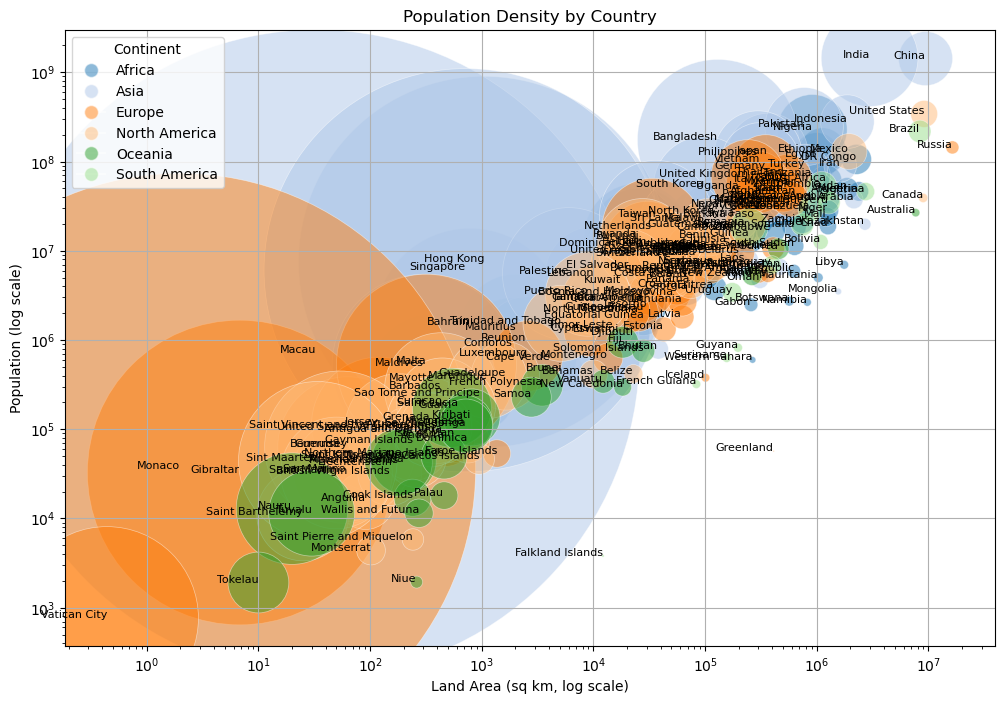

In [32]:
# Extract data
country = df['country']
pop2024 = df['pop2024']
landAreaKm = df['landAreaKm']
Density_2024 = df['Density_2024']
continent = df['continent']

# Define a colormap for continents
continents = df['continent'].unique()
colors = plt.cm.tab20(range(len(continents)))  # Using a colormap with enough distinct colors
continent_color_map = dict(zip(continents, colors))

# Bubble chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    landAreaKm, pop2024, 
    s=[d * 10 for d in Density_2024], 
    alpha=0.5, 
    c=[continent_color_map[cont] for cont in continent],  # Assign colors based on continent
    edgecolors="w", 
    linewidth=0.5  # Reduce the linewidth for better visualization
)

# Add labels
for i, country in enumerate(df['country']):
    plt.text(landAreaKm[i], pop2024[i], country, fontsize=8, ha='right')

# Create a legend for continents
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cont, markersize=10, 
                      markerfacecolor=continent_color_map[cont], alpha=0.5) for cont in continents]
plt.legend(handles=handles, title="Continent")

# Set labels and title
plt.xscale('log')  # Log scale for area
plt.yscale('log')  # Log scale for population
plt.xlabel('Land Area (sq km, log scale)')
plt.ylabel('Population (log scale)')
plt.title('Population Density by Country')
plt.grid(True)

plt.show()